In [1]:
# 导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 处理中文字体
from matplotlib import rcParams
rcParams['font.family']='Microsoft YaHei'

# 导入数据
df=pd.read_csv('data/house_sales.csv')
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year,origin_url
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建,https://hf.esf.fang.com/chushou/3_404372096.htm


In [2]:
# 数据清洗
# 删除无用的数据 url
df.drop(columns='origin_url',inplace=True)

In [3]:
# 删除缺失值
df.dropna(inplace=True)

In [4]:
# 重复数据
df.duplicated().sum()

np.int64(29416)

In [5]:
# 删除重复数据
df.drop_duplicates(inplace=True)

In [6]:
# 数据类型的转换
# 面积数据类型的转换，字符串转化为float
df['area']=df['area'].str.replace('㎡','').astype(float)


# 价格数据类型的转换，字符串转化为float
df['price']=df['price'].str.replace('万','').astype(float)


# 朝向的数据类型转换
df['toward']=df['toward'].astype('category')


# 单价的数据类型转换
df['unit']=df['unit'].str.replace('元/㎡','').astype(float)


# 建造年份的数据类型转换
df['year']=df['year'].str.replace('年建','').astype(int)

In [ ]:
# 异常值的处理
# 房屋面积的异常处理
df=df[(df['area']<600) & (df['area']>20)]


# 房屋售价的异常值处理 IQR
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1
low_price=Q1-1.5*IQR
high_price=Q3+1.5*IQR
df=df[(df['price']>low_price) & (df['price']<high_price)]



# 新数据特征构造

# 地区district
df['district']=df['address'].str.split('-').str[0]


# 楼层类型floor_type
def fun1(str1):
    if pd.isna(str1):
        return '未知'
    elif '低' in str1:
        return '低楼层'
    elif '中' in str1:
        return '中楼层'
    elif '高' in str1:
        return '高楼层'
    else :
        return '未知'
    
df['floor_type']=df['floor'].apply(fun1)


# 是否是直辖市zxs
df['zxs']=df['city'].apply(lambda x:1 if x in ['北京','上海','重庆','天津'] else 0)


# 卧室数量bedrooms
df['bedrooms']=df['rooms'].str.split('室').str[0].astype(int)

# 客厅数量livingrooms
df['livingrooms']=df['rooms'].str.extract(r'(\d+)厅').astype(int) # 使用正则表达式


# 楼龄building_age
df['building_age']=2025-df['year']


# 价格的分段Price_labels
df['price_labels']=pd.cut(df['price'],4,labels=['低价','中价','高价','豪华']) # 使用分箱操作

In [ ]:
'''
哪些变量最影响房价？面积、楼层、房间数哪个影响更大？
分析主题：特征相关性
分析目标：了解房价各特征对房价的线性影响
分组字段：无
指标/方法：皮尔逊相关系数
'''

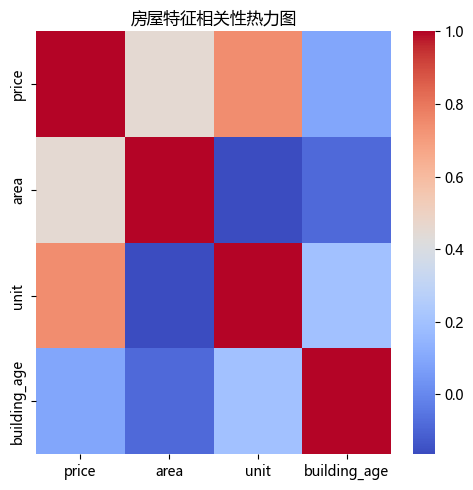

In [45]:
# 选择数值型特征
a=df[['price','area','unit','building_age']].corr() # 相关系数


# 对房价的影响最大的几个因素的排序
a['price'].sort_values(ascending=False)[1:]


# 相关性的热力图
plt.figure(figsize=(5,5))
plt.title('房屋特征相关性热力图')
sns.heatmap(a,cmap='coolwarm') # sns.heatmap() 同时设置cmap='coolwarm'改变颜色
plt.tight_layout()

In [ ]:
'''
问题：全国房价总体分布是怎么样的？是否存在极端值？
分析主题：描述性统计
分析目标：概览数值型字段的分布特征
分组字段：无
指标/方法：平均数/中位数/四分位数/标准差
'''

In [47]:
df.describe()

,area,price,unit,year,zxs,bedrooms,livingrooms,building_age
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,103.755810,117.208370,11610.131012,2013.072240,0.008800,2.714444,1.848556,11.927760
std,33.995994,60.967675,5824.245273,6.019342,0.093399,0.800768,0.407353,6.019342
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,0.000000,2.000000
25%,85.005000,72.000000,7587.000000,2011.000000,0.000000,2.000000,2.000000,8.000000
50%,100.000000,103.000000,10312.000000,2015.000000,0.000000,3.000000,2.000000,10.000000
75%,123.000000,150.000000,14184.000000,2017.000000,0.000000,3.000000,2.000000,14.000000
max,470.000000,306.000000,85288.000000,2023.000000,1.000000,9.000000,12.000000,49.000000


(array([ 146.,  845., 1854., 2956., 3372., 3127., 2322., 2291., 1975.,
        1387., 1282.,  944.,  798.,  535.,  610.,  445.,  409.,  282.,
         321.,  234.]),
 array([  9.  ,  23.85,  38.7 ,  53.55,  68.4 ,  83.25,  98.1 , 112.95,
        127.8 , 142.65, 157.5 , 172.35, 187.2 , 202.05, 216.9 , 231.75,
        246.6 , 261.45, 276.3 , 291.15, 306.  ]),
 <BarContainer object of 20 artists>)

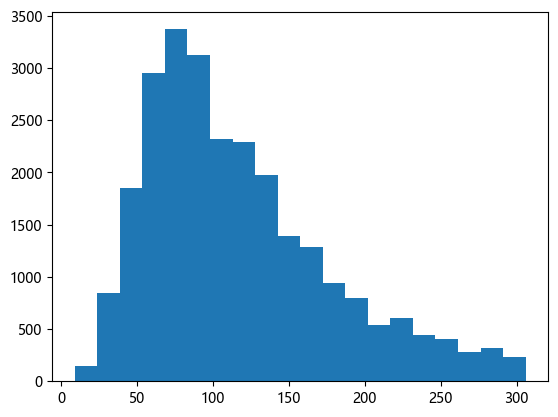

In [52]:
# 房价分布直方图
plt.subplot()
plt.hist(df['price'],20)

<Axes: xlabel='price', ylabel='Count'>

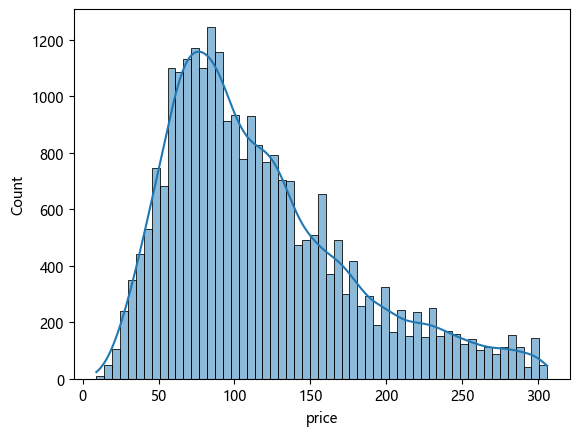

In [54]:
sns.histplot(data=df,x='price',kde=True)

In [ ]:
'''
问题：南北向是否真的比单一朝向贵？贵多少？
分析主题：朝向溢价
分析目标：评估不同朝向的价格差异
分组字段:toward
指标/方法：方差分析/多重比较
'''

In [58]:
df.groupby('toward').agg({
    'price':['mean','median'],
    'unit':'median',
    'building_age':'mean'
})

C:\Users\liangqi\AppData\Local\Temp\ipykernel_9292\843296493.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('toward').agg({


price            unit building_age
              mean median   median         mean
toward                                         
东北向     114.555333  100.0  12198.0    12.609524
东南向     115.542608  105.0  10864.0    10.951745
东向      110.158568   95.0  11421.0    12.761337
东西向      98.935099   82.0   9000.0    15.490066
北向       92.527907   75.5  11698.0    13.108527
南北向     119.472147  104.5  10000.0    12.073703
南向      114.555016  103.0  10759.0    11.551160
西北向     119.107594  105.0  12290.0    13.473684
西南向     139.711811  138.4  13333.0    13.452756
西向      102.662298   86.0  12528.0    13.385093

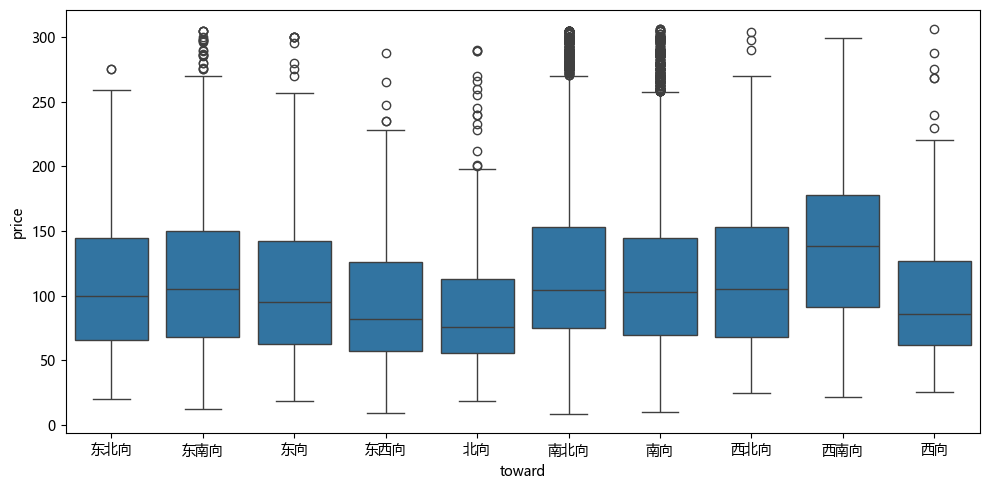

In [61]:
# 数据可视化
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='toward',y='price')
plt.tight_layout()